In [1]:
from jax import numpy as jnp, random
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from lqg.model import System, Dynamics, Actor

In [189]:
class SlowVelocityPriorModel(System):
    def __init__(self, beta=1., sigma=1., dt=1./60.):


        A = jnp.array([[1., dt, 0., 0.], 
                       [0., 1., 0., 0.],
                       [0., 0., 1., dt],
                       [0., 0., 0., 1.]])

        A_subj = jnp.array([[1., dt, 0., 0.], 
                            [0., beta, 0., 0.],
                            [0., 0., 1., dt],
                            [0., 0., 0., 1.]])

        B = jnp.array([[0.], [0.], [0.], [1.]])

        C = jnp.eye(4)

        V = jnp.eye(4) * 0. # jnp.diag(jnp.array([0., 1., 0., 0.]))
        V_subj = jnp.diag(jnp.array([0., 1., 0., 0.]))
        W = jnp.diag(jnp.array([1., dt, 1., dt])) * sigma

        Q = jnp.array([[1., 0., -1., 0.],
                      [0., 0., 0., 0.],
                      [-1., 0., 1., 0.],
                      [0., 0., 0., 0.]])
        R = jnp.array([1.])

        super().__init__(dynamics=Dynamics(A=A, B=B, C=C, V=V, W=W),
                       actor=Actor(A=A_subj, B=B, C=C, V=V_subj, W=W, Q=Q, R=R))

In [190]:
model = SlowVelocityPriorModel(beta=0.98)

x, xhat, y, u = model.simulate(random.PRNGKey(0), n=20, T=500, return_all=True,
                              x0=jnp.array([0., 1., 0., 0.]))

Text(0, 0.5, 'Velocity')

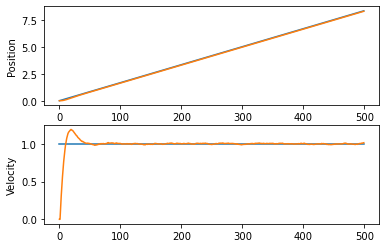

In [191]:
f, ax = plt.subplots(2)
ax[0].plot(x[:,0,0])
ax[0].plot(x[:,0,2])
ax[0].set_ylabel("Position")

ax[1].plot(x[:,0,1])
ax[1].plot(x[:,0,3])
ax[1].set_ylabel("Velocity")

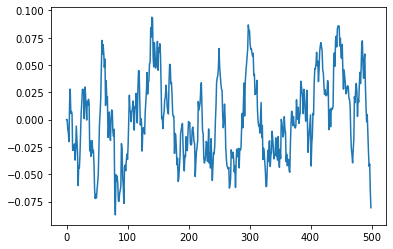

In [198]:
model1 = SlowVelocityPriorModel(beta=.9, sigma=1.)
model2 = SlowVelocityPriorModel(beta=.9, sigma=10.)


x1, xhat1, y1, u1 = model1.simulate(random.PRNGKey(0), n=20, T=500, return_all=True,
                    x0=jnp.array([0., 1., 0., 0.]))
x2, xhat2, y2, u2 = model2.simulate(random.PRNGKey(0), n=20, T=500, return_all=True,
                    x0=jnp.array([0., 1., 0., 0.]))

plt.plot(x1[:,0,3] - x2[:,0,3])